# ML Assigment 2

Assignment is based on Binary Logistic Regression
- 2 Predictors
- 1 Output variable

## Question 1

Use logistic regression to find decision boundary For the given database. Set your learning rate to 0.1. What is the cost function value and learning coefficients value after convergence?

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_csv("data/logisticX.csv", header=None)
y = pd.read_csv("data/logisticY.csv", header=None)

print(X.describe())

                0           1
count  100.000000  100.000000
mean     4.618717    4.522868
std      1.325572    1.394154
min      1.440000    1.537200
25%      3.706600    3.595875
50%      4.523700    4.544700
75%      5.539200    5.506450
max      8.415300    7.505700


The data seems to be already normalized.

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
model = LogisticRegression()
# Set learning rate to 0.1
model.set_params(C=10)
# Set the iterations to 50
model.set_params(max_iter=50)
model.fit(X, y.values.ravel())

LogisticRegression(C=10, max_iter=50)

In [5]:
# Print the coefficients
df = pd.DataFrame(np.transpose(model.coef_), index=['X1', 'X2'], columns=['Coefficients'])
print(df)

    Coefficients
X1      1.896161
X2     -1.898029


## Question 2

Plot cost function v/s iteration graph for the model trained in question 1. Plot graph for first 50 iterations.

In [6]:
# Cant be done with sklearn

## Question 3

Plot the given dataset on a graph, use different colors for different classes and also plot the decision boundary you obtained in question 1.

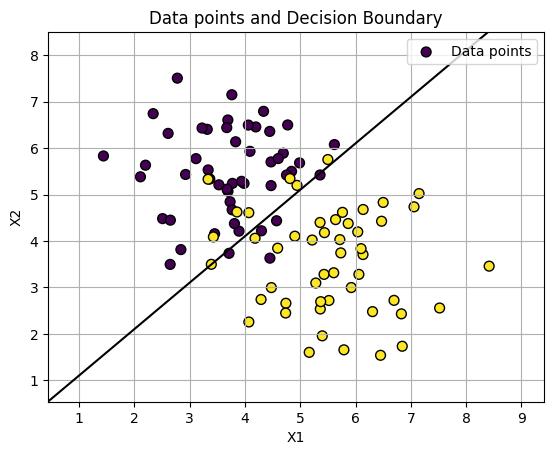

In [7]:
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X[0], X[1], c=y, cmap='viridis', edgecolor='k', s=50, label='Data points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data points and Decision Boundary')
plt.legend()

# Create a mesh grid
x_min, x_max = X[0].min() - 1, X[0].max() + 1
y_min, y_max = X[1].min() - 1, X[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the values for the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0.5], cmap="Greys_r")

# Add grid
plt.grid(True)

plt.show()

## Question 4

Introduce 2 new independent variables in the dataset and set their values equal to the square of the original 2 variables. Again train the dataset using logistic regression and plot the data points and decision boundary for this new dataset.

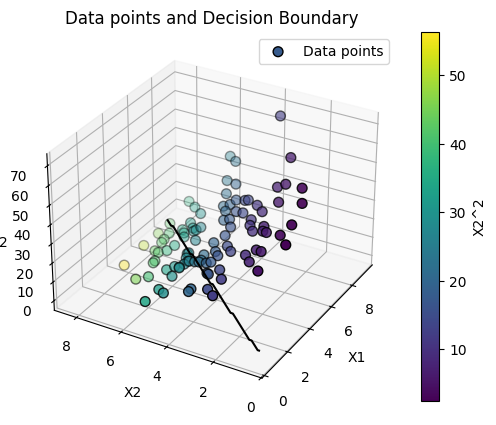

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Load the data
X = pd.read_csv('data/logisticX.csv', header=None)
y = pd.read_csv('data/logisticY.csv', header=None)

# Introduce 2 new independent variables
X['X1^2'] = X[0] ** 2
X['X2^2'] = X[1] ** 2

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Train the logistic regression model
model = LogisticRegression()
model.set_params(C=10, max_iter=50)
model.fit(X, y.values.ravel())

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
sc = ax.scatter(X['0'], X['1'], X['X1^2'], c=X['X2^2'], cmap='viridis', edgecolor='k', s=50, label='Data points')
plt.colorbar(sc, label='X2^2')

# Create a mesh grid
x_min, x_max = X['0'].min() - 1, X['0'].max() + 1
y_min, y_max = X['1'].min() - 1, X['1'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the values for the mesh grid
mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel(), (xx.ravel() ** 2), (yy.ravel() ** 2)], columns=X.columns)
Z = model.predict(mesh_data)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
ax.contour3D(xx, yy, Z, levels=[0.5], cmap="Greys_r")

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1^2')

# Set the viewing angle
ax.view_init(elev=30, azim=210)  # Adjust these values as needed

plt.title('Data points and Decision Boundary')
plt.legend()
plt.show()

## Question 5

Find the confusion matrix for your training dataset. Using the confusion matrix to calculate the accuracy, precision, recall, and F1-score.


In [9]:
from sklearn.metrics import confusion_matrix

# Predict the values
y_pred = model.predict(X)

# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred)

# Calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

# Calculate the precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate the recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Calculate the F1-score
f1_score = 2 * precision * recall / (precision + recall)

print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')



Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.87
Precision: 0.8936170212765957
Recall: 0.84
F1-Score: 0.8659793814432989
